In [2]:
# current date, for retrieving data from proper location.
year = "2022"
month = "November"
day = "7"

In [3]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImage

In [4]:
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [5]:
reloadMyModules(7)

In [ ]:
## plot every image from scan

#     plt.imshow(rawData[2])
#     for i in range(len(rawData)):
#         plt.imshow(rawData[i])
#         plt.show()

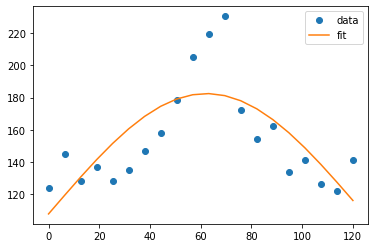

In [46]:
# 1D Gaussian Practice
ef oneD_Gauss(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0)**2 / (2 * sigma**2)) 
x = np.linspace(0, 120, 20)
gdata = avrg_pic[5:25,0:20]
y =gdata[10,:]
# plt.plot(x,y)
# plt.imshow(gdata)
popt, pcov = curve_fit(oneD_Gauss, x, y)
ym = oneD_Gauss(x, popt[0], popt[1], popt[2])
plt.plot(x, y, 'o', label='data')
plt.plot(x, ym, '-', label='fit')
plt.legend()

### Fit atom signal with 2D Gaussian

In [ ]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\April\\April 13\\Raw Data\\data_108.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
# print(np.shape(rawData))    
atom_sig = avrg_pic[0:15,2:14]
# plt.imshow(atom_sig)
initfit = fitManyGaussianImage(atom_sig,1,threshold=10)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'+/- 0.02 \u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'+/- 0.02 \u03BCm')
# print('sigma y =',initfit[5]* pixel_size/mag,'\u03BCm')

Found 1 Maxima.
sigma_x = 0.30427171804738024 μm
sigma_y = 0.4103917488207803 μm
sigma average =  0.35733173343408026 μm


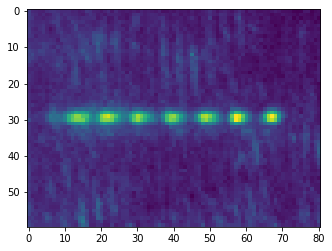

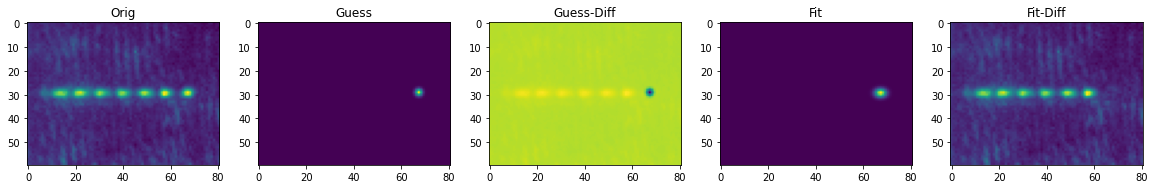

In [37]:
filename = "/Volumes/Local_Data_Repository/2024/May/May 1/Raw Data/data_23.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=12.1)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


Found 1 Maxima.
sigma_x = 0.34078399981906726 μm
sigma_y = 0.45097518857871455 μm
sigma average =  0.3958795941988909 μm


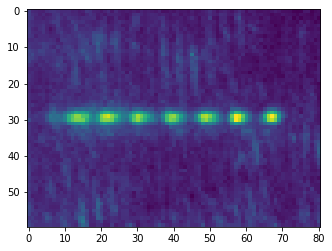

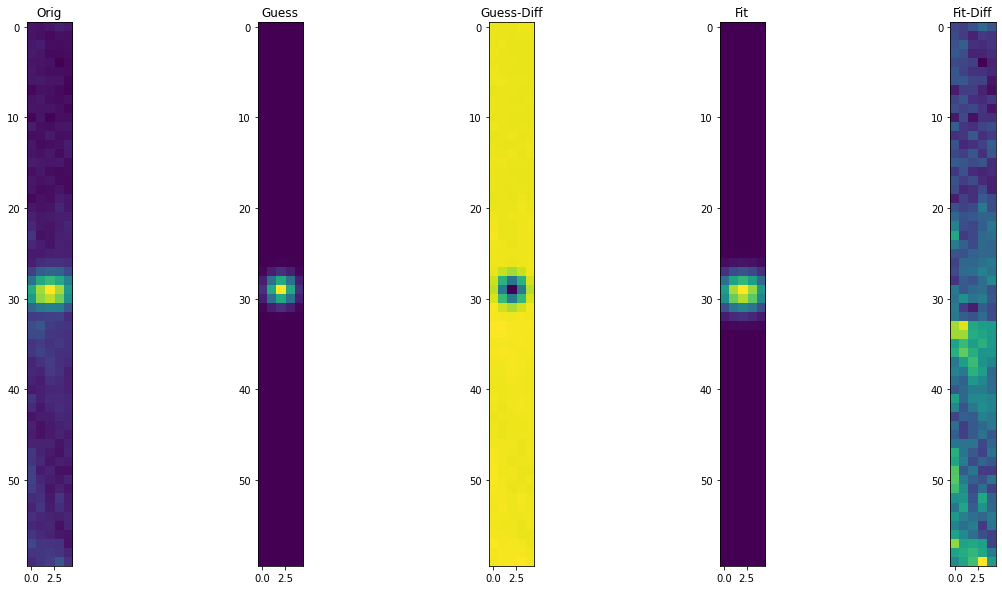

In [41]:
filename = "/Volumes/Local_Data_Repository/2024/May/May 1/Raw Data/data_23.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,65:70]
# atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=12.1)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


Found 1 Maxima.
PSF_x = 0.3891637772925716 μm
PSF_y = 0.4460534518124059 μm
sigma average =  0.41760861455248877 μm


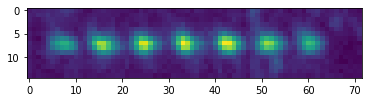

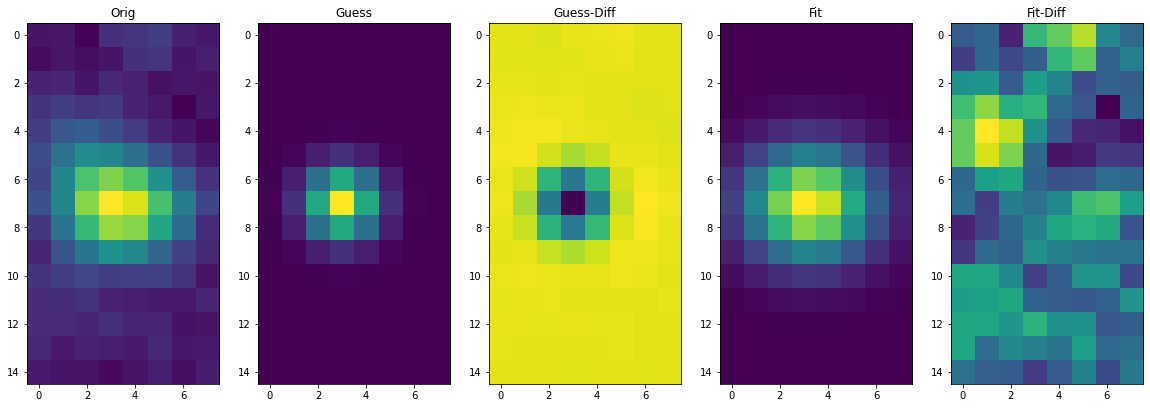

In [21]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\November\\November 18\\Raw Data\\data_68.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
# atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=1)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


Found 1 Maxima.
PSF_x = 0.36912854884838686 μm
PSF_y = 0.49596802930909417 μm
sigma average =  0.43254828907874054 μm


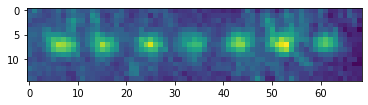

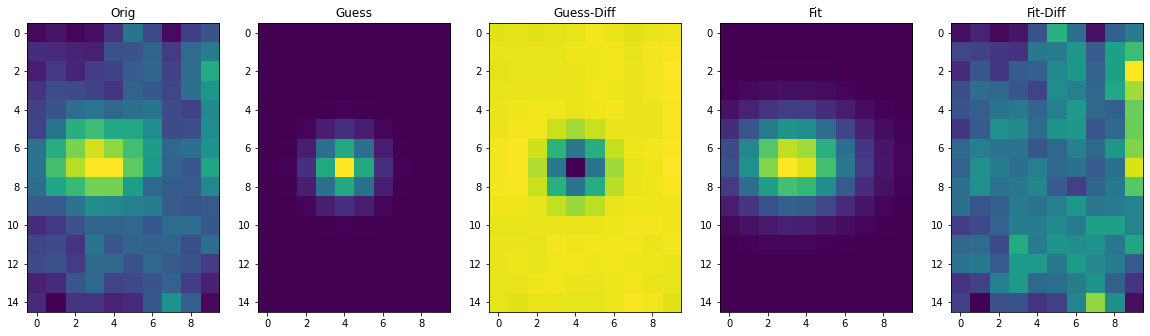

In [58]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\November\\November 7\\Raw Data\\data_36.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ## fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,40:50]
# atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=1)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


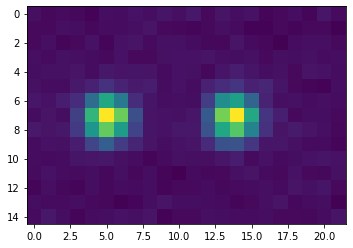

In [31]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\October\\October 14\\Raw Data\\data_11.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic[240:255,257:279])
## fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
# atom_sig = avrg_pic[240:255,265:279]
# initfit = fitManyGaussianImage(atom_sig,1,threshold=7)
# pixel_size = 16
# mag = 64
# psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
# print('PSF_x =',initfit[5]* pixel_size/mag,'\u03BCm')
# print('PSF_y =',initfit[4]* pixel_size/mag,'\u03BCm')
# print('sigma average = ',psf,'\u03BCm')


In [133]:
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')

IndexError: tuple index out of range

Found 1 Maxima.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning:

Covariance of the parameters could not be estimated



IndexError: list index out of range

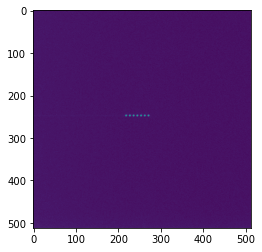

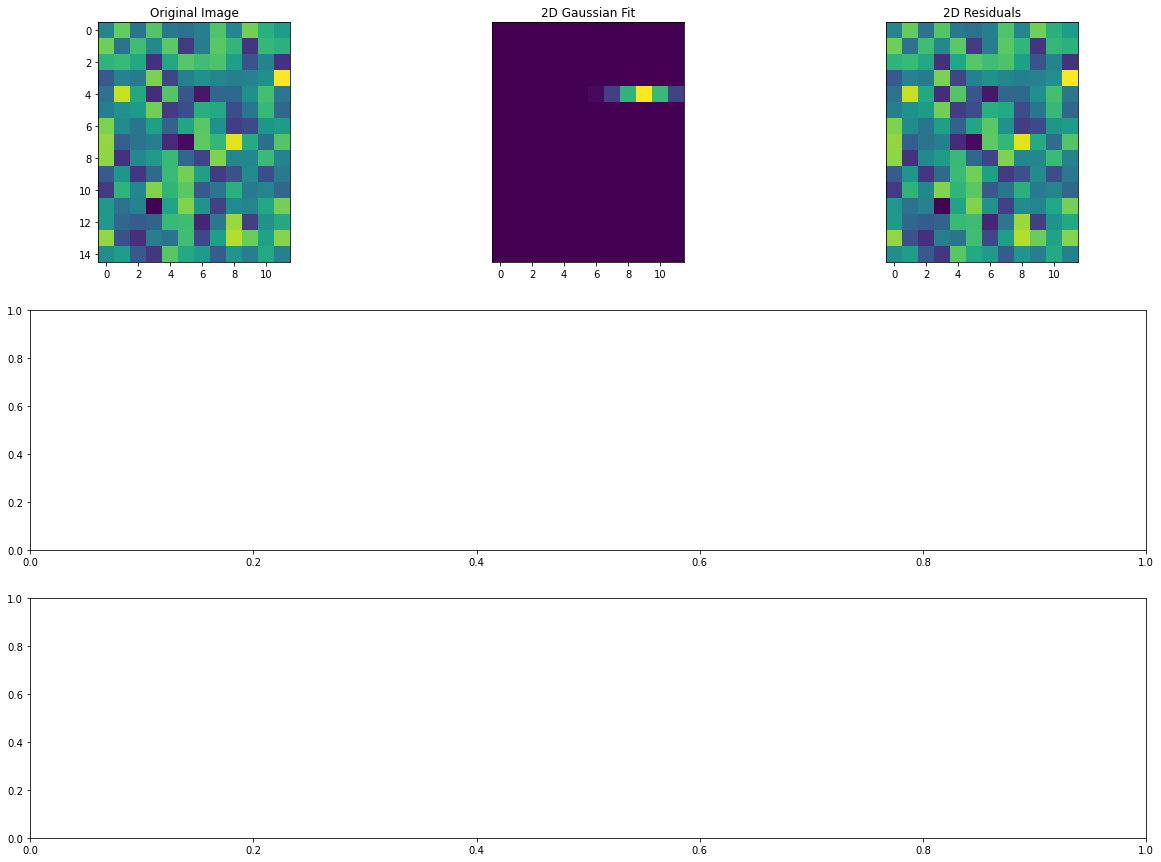

In [9]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\October\\October 14\\Raw Data\\data_11.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
# print(np.shape(rawData))    
atom_sig = avrg_pic[0:15,2:14]
# plt.imshow(atom_sig)
initfit = fitManyGaussianImage(atom_sig,1,threshold=1)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'+/- 0.02 \u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'+/- 0.02 \u03BCm')
# print('sigma y =',initfit[5]* pixel_size/mag,'\u03BCm')

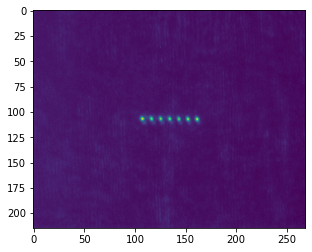

In [154]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\April\\April 13\\Raw Data\\data_111.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)


Found 1 Maxima.


IndexError: list index out of range

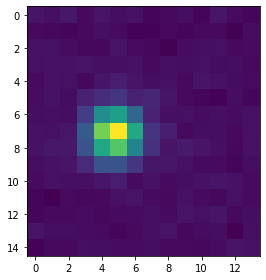

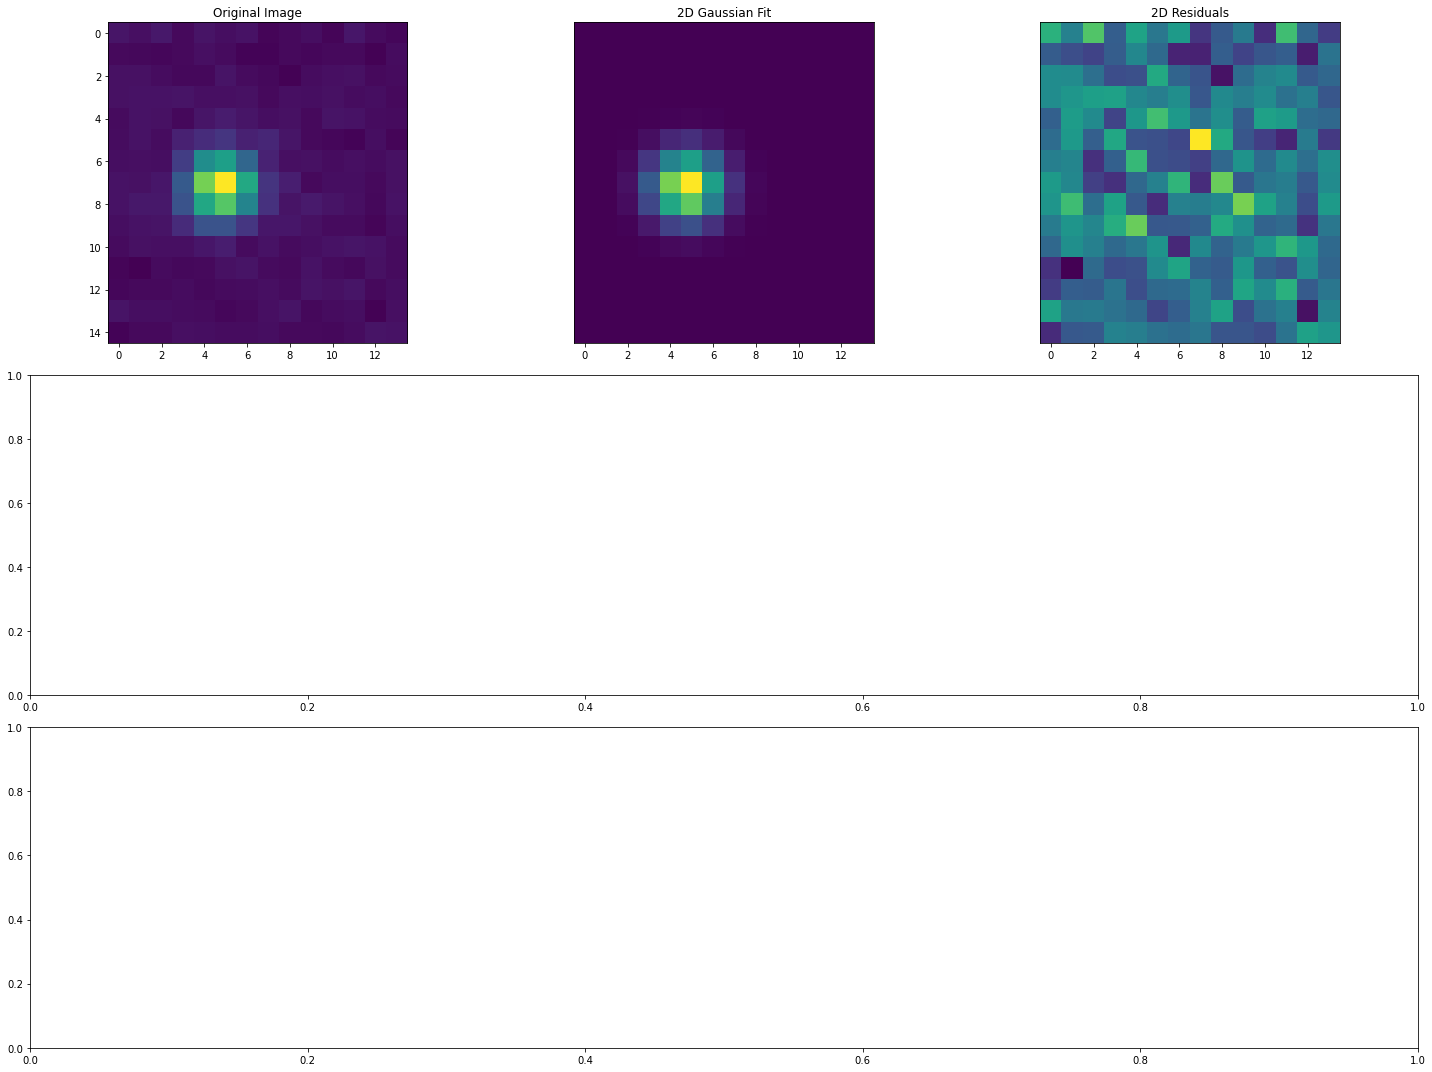

In [64]:
reloadMyModules(14)
atom_sig = avrg_pic
# atom_sig = avrg_pic[240:255,266:280]
plt.imshow(atom_sig)
initfit = fitManyGaussianImage(atom_sig,1,threshold=1)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'+/- 0.02 \u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'+/- 0.02 \u03BCm')
print('PSF = ',psf,'\u03BCm')

Found 1 Maxima.
sigma_x = 0.5171166979468383 μm
sigma_y = 0.8892238987107536 μm
sigma average =  0.703170298328796 μm


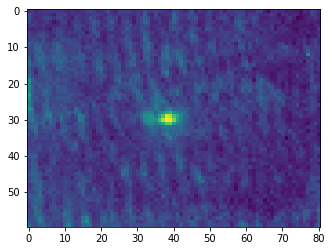

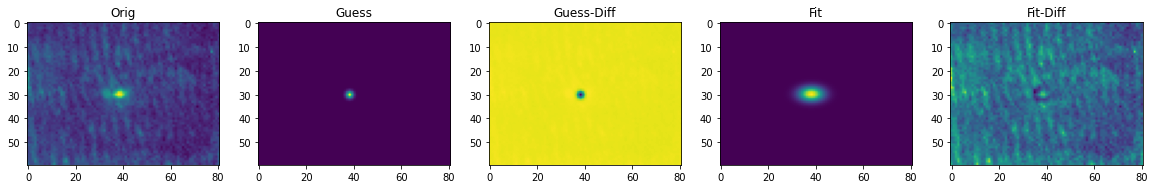

In [44]:
filename = "/Volumes/Local_Data_Repository/2024/May/May 8/Raw Data/data_25.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


Found 1 Maxima.
sigma_x = 0.35107452533374334 μm
sigma_y = 0.7369865007515392 μm
sigma average =  0.5440305130426413 μm


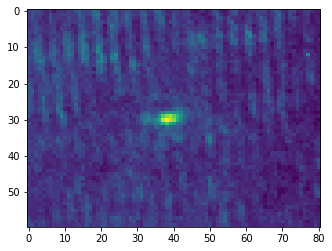

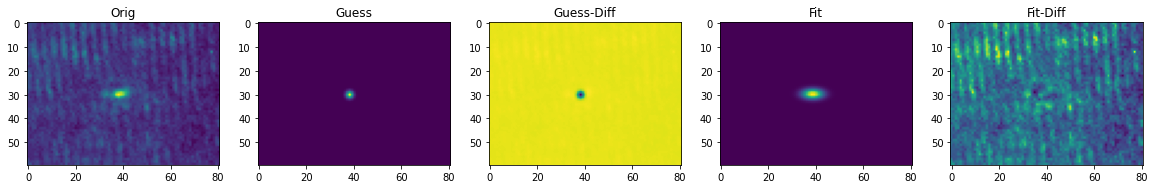

In [46]:
filename = "/Volumes/Local_Data_Repository/2024/May/May 8/Raw Data/data_27.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


Found 1 Maxima.
sigma_x = 0.38264497763103383 μm
sigma_y = 0.9223709540600618 μm
sigma average =  0.6525079658455478 μm


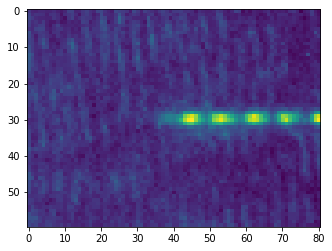

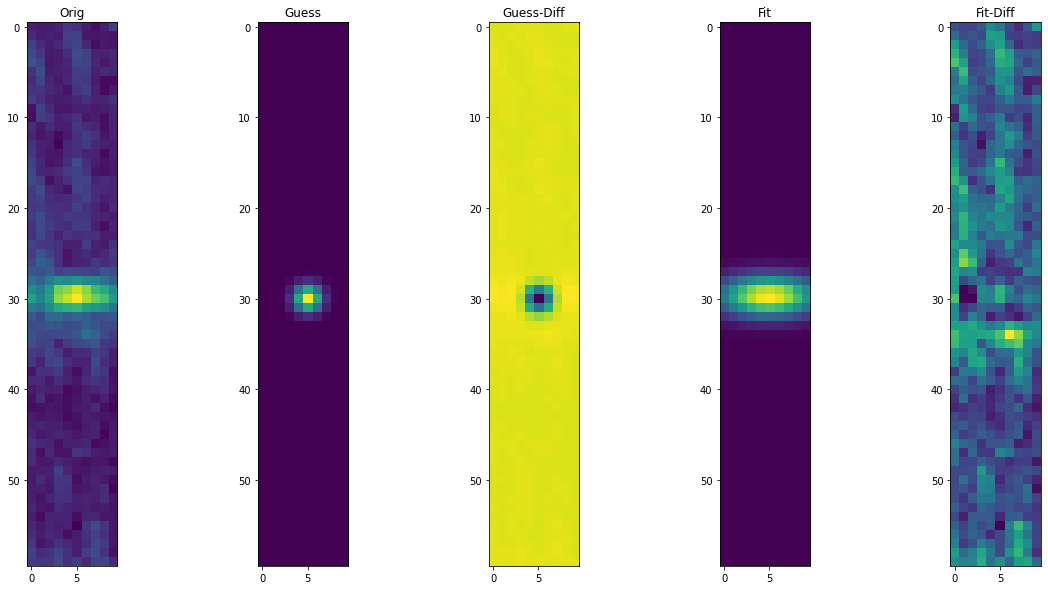

In [72]:
filename = "/Volumes/Local_Data_Repository/2024/May/May 8/Raw Data/data_28.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,48:58]
# atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


Found 2 Maxima.


ValueError: ERROR: didn't find the right number of maxima!

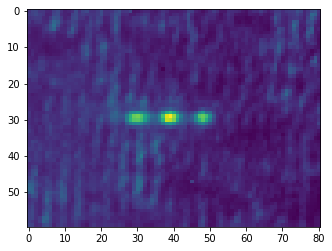

In [81]:
filename = "/Volumes/Local_Data_Repository/2024/May/May 9/Raw Data/data_1.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,8:16]
# atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=40)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')


### 6.0 cm from RHS of stage

Found 1 Maxima.
sigma_x = 0.6262080928817012 μm
sigma_y = 0.5485532684552183 μm
sigma average =  0.5873806806684598 μm
amplitude= 5.91371231488322


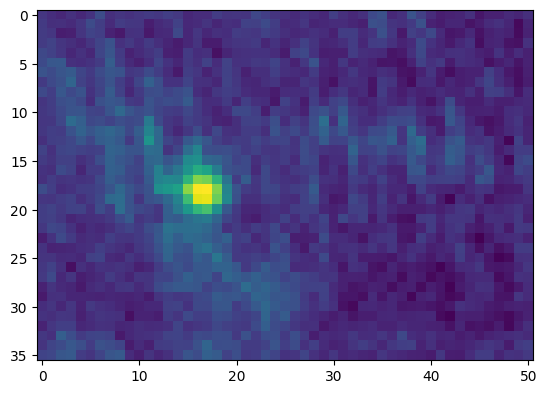

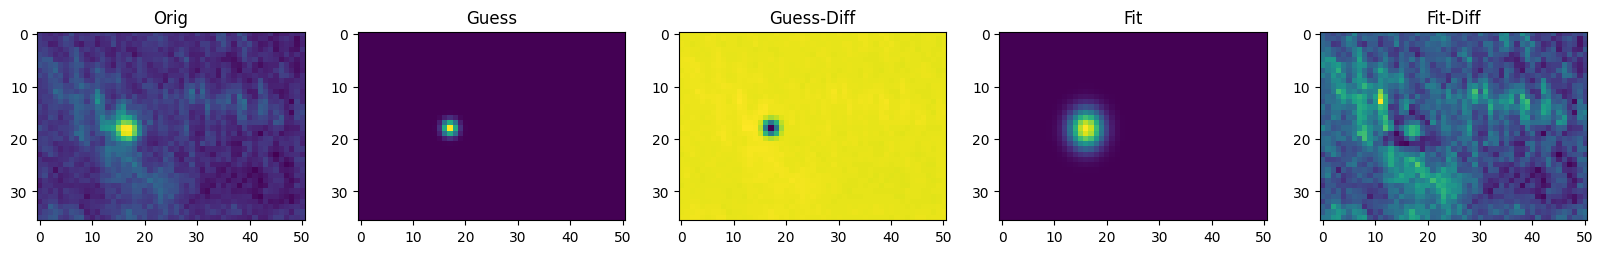

In [30]:
filename = "/Volumes/Local_Data_Repository/2024/October/October 2/Raw Data/data_7.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
amp = (initfit[1])
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')
print('amplitude=', amp)

### 6.7 cm from RHS of stage

Found 1 Maxima.
sigma_x = 0.4643456767474891 μm
sigma_y = 0.5095437259445803 μm
sigma average =  0.48694470134603474 μm
amplitude= 8.956231721517428


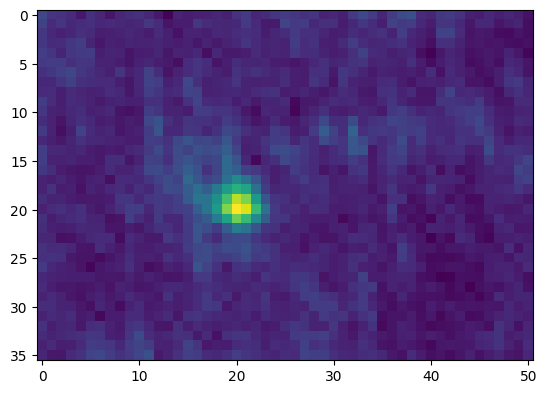

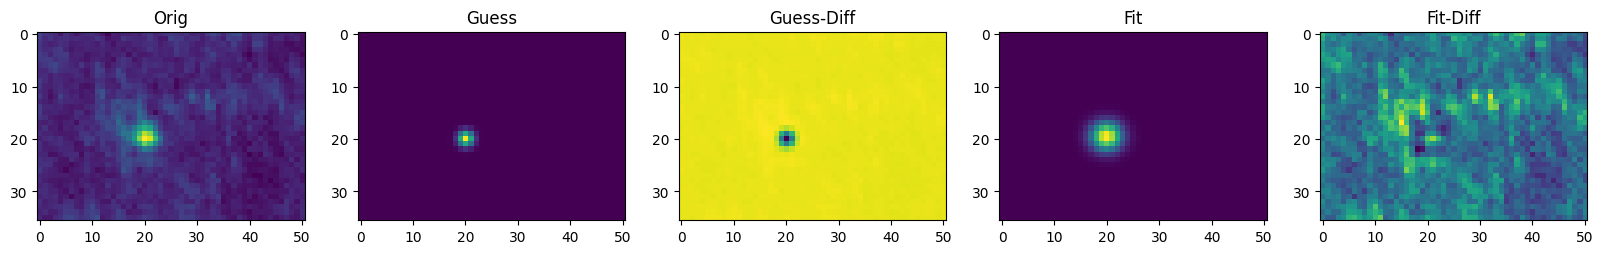

In [29]:
filename = "/Volumes/Local_Data_Repository/2024/October/October 2/Raw Data/data_6.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
amp = (initfit[1])
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')
print('amplitude=', amp)

### 7 cm from RHS of stage

Found 1 Maxima.
sigma_x = 0.35358390414150914 μm
sigma_y = 0.5323090437530102 μm
sigma average =  0.4429464739472597 μm
amplitude= 9.420059275057902


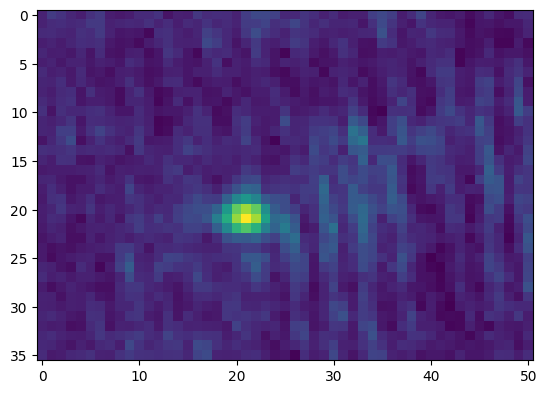

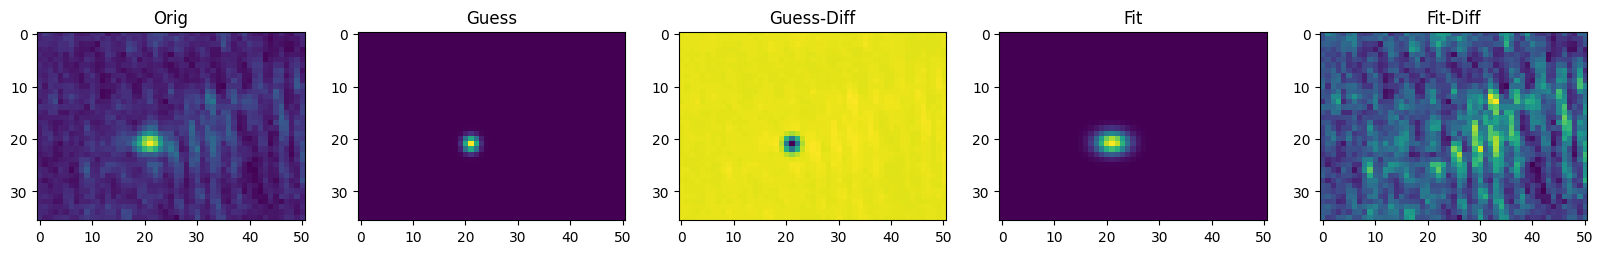

In [35]:
filename = "/Volumes/Local_Data_Repository/2024/October/October 2/Raw Data/data_9.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
amp = (initfit[1])
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')
print('amplitude=', amp)

### 7.3 cm from RHS of stage

Found 1 Maxima.
sigma_x = 0.3759323882878535 μm
sigma_y = 0.7568434291734042 μm
sigma average =  0.5663879087306288 μm
amplitude= 7.4686095275161275


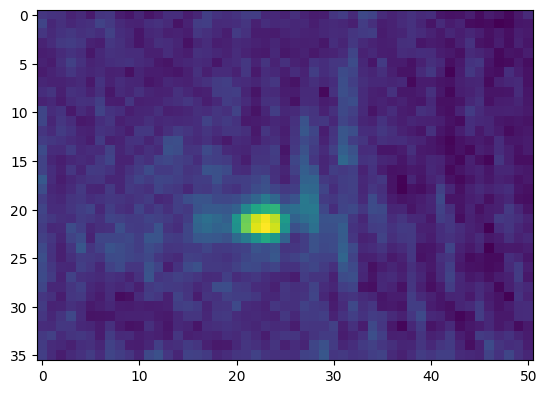

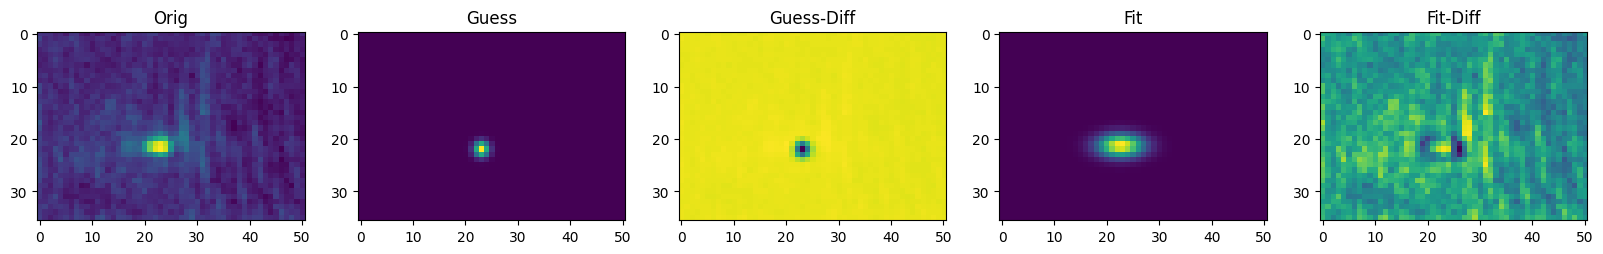

In [28]:
filename = "/Volumes/Local_Data_Repository/2024/October/October 2/Raw Data/data_5.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
amp = (initfit[1])
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')
print('amplitude=', amp)

### 8 cm from RHS of stage

Found 1 Maxima.
sigma_x = 0.7015585226910362 μm
sigma_y = 0.9826237673047987 μm
sigma average =  0.8420911449979175 μm
amplitude= 3.7962496817135056


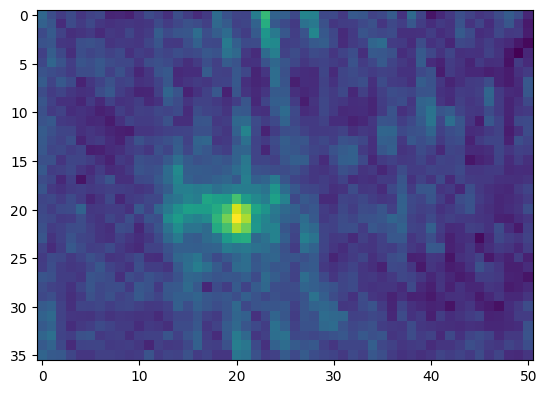

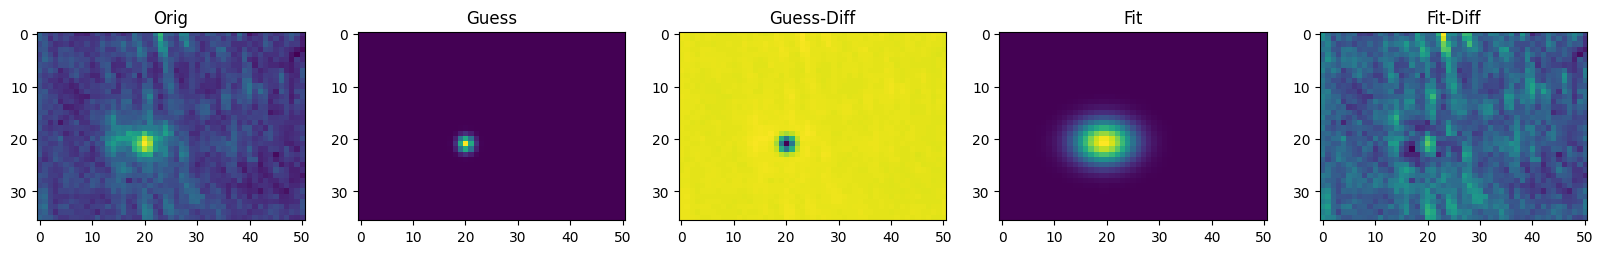

In [31]:
filename = "/Volumes/Local_Data_Repository/2024/October/October 2/Raw Data/data_8.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
    
    ### fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]  
atom_sig = avrg_pic[:,57:65]
atom_sig = avrg_pic
initfit = fitManyGaussianImage(atom_sig,1,threshold=4.5)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
amp = (initfit[1])
print('sigma_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('sigma_y =',initfit[4]* pixel_size/mag,'\u03BCm')
print('sigma average = ',psf,'\u03BCm')
print('amplitude=', amp)


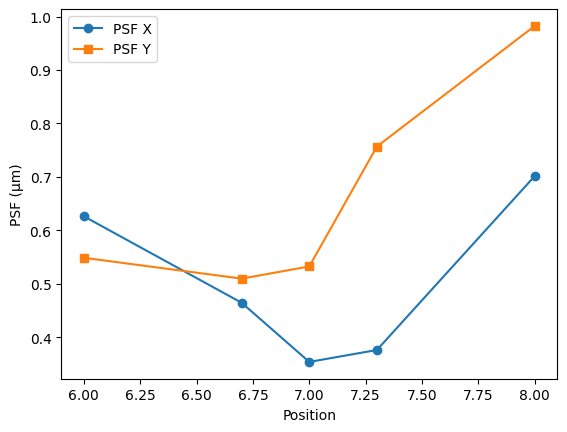

In [36]:
psf_x = [0.6262080928817012, 0.4643456767474891, 0.35358390414150914,0.3759323882878535, 0.7015585226910362]
psf_y = [0.5485532684552183, 0.5095437259445803,0.5323090437530102, 0.7568434291734042, 0.9826237673047987]
position = [6, 6.7,7, 7.3, 8]

# Create the plot
plt.figure()

# Plot PSF_x and PSF_y vs position
plt.plot(position, psf_x, 'o-', label='PSF X')
plt.plot(position, psf_y, 's-', label='PSF Y')

# Add labels and title
plt.xlabel('Position')
plt.ylabel('PSF (\u03BCm)')
# plt.title('PSF in X and Y vs Position')

# Add legend
plt.legend()

# Display the plot
plt.show()